In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
for x in np.geomspace(0.015, 20.0, 100):
    print(f'{x:.3f}', end=" ")
print()

0.015 0.016 0.017 0.019 0.020 0.022 0.023 0.025 0.027 0.029 0.031 0.033 0.036 0.039 0.041 0.045 0.048 0.052 0.055 0.060 0.064 0.069 0.074 0.080 0.086 0.092 0.099 0.107 0.115 0.123 0.133 0.143 0.154 0.165 0.178 0.191 0.205 0.221 0.237 0.255 0.275 0.295 0.318 0.341 0.367 0.395 0.425 0.457 0.491 0.528 0.568 0.611 0.657 0.706 0.760 0.817 0.878 0.945 1.016 1.093 1.175 1.263 1.359 1.461 1.571 1.690 1.817 1.954 2.101 2.260 2.430 2.613 2.810 3.022 3.250 3.495 3.759 4.042 4.347 4.674 5.027 5.406 5.813 6.252 6.723 7.230 7.775 8.361 8.991 9.669 10.398 11.182 12.025 12.931 13.906 14.954 16.082 17.294 18.598 20.000 


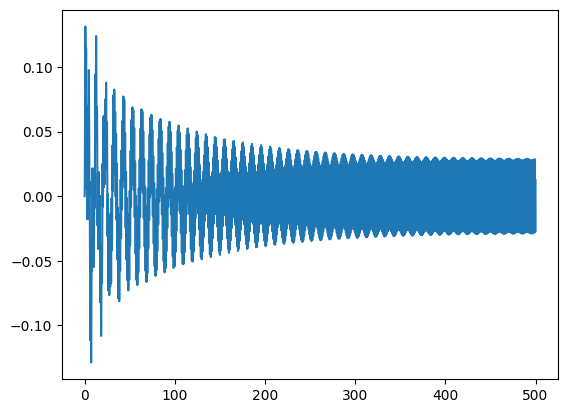

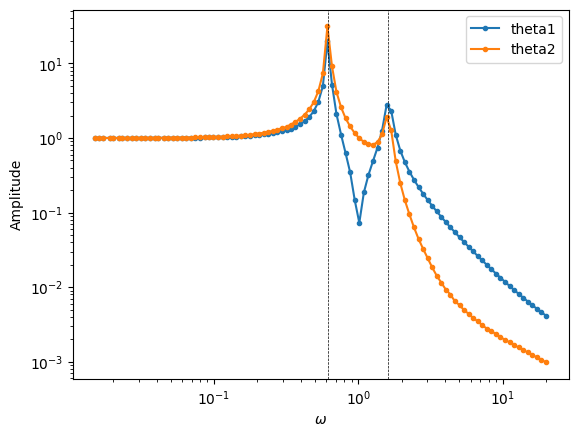

In [6]:
results = []
k = 0
for f in Path('./sweep').glob('*.csv'):
    df = pd.read_csv(f, header=0, names=['time', 'th1', 'th2', 'th1dot', 'th2dot'])
    omega = float(f.stem.split('_')[-1])
    # find max in the last 25% of the data
    N = len(df)
    i = int(N*0.75)
    th1max = df['th1'].iloc[i:].max()
    th2max = df['th2'].iloc[i:].max()
    result = {'omega': omega, 'th1max': th1max, 'th2max': th2max}
    results.append(result)
    if k==20:
        plt.plot(df['time'], df['th1'], label=f'omega={omega}')
        plt.show()
    k += 1
df = pd.DataFrame(results)
df = df.sort_values('omega').reset_index(drop=True)
plt.plot(df['omega'], df['th1max'], '.-', label='theta1')
plt.plot(df['omega'], df['th2max'], '.-', label='theta2')
plt.axvline(np.sqrt(0.382), color='k', linestyle='--', lw=0.5)
plt.axvline(np.sqrt(2.618), color='k', linestyle='--', lw=0.5)
plt.xlabel(r'$\omega$')
plt.ylabel('Amplitude')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()